In [19]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np

In [8]:
zip_codes = gpd.read_file('data/zip/cb_2019_us_zcta510_500k.shp')

In [11]:
zip_codes

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,35586,8600000US35586,35586,472581657,892816,"MULTIPOLYGON (((-88.00160 33.81101, -88.00258 ..."
1,72454,8600000US72454,72454,263532032,775633,"POLYGON ((-90.41711 36.36553, -90.41686 36.390..."
2,71653,8600000US71653,71653,817752215,89308151,"POLYGON ((-91.45936 33.30273, -91.45758 33.381..."
3,19963,8600000US19963,19963,276290156,21123546,"POLYGON ((-75.50557 38.92751, -75.50313 38.927..."
4,81303,8600000US81303,81303,557450510,6445737,"POLYGON ((-108.04031 37.09764, -108.03896 37.1..."
...,...,...,...,...,...,...
33139,17003,8600000US17003,17003,123199815,508564,"POLYGON ((-76.66433 40.44901, -76.66015 40.451..."
33140,16051,8600000US16051,16051,100692312,7867364,"MULTIPOLYGON (((-80.16969 40.89718, -80.16599 ..."
33141,16066,8600000US16066,16066,57882926,29055,"POLYGON ((-80.15256 40.74410, -80.13838 40.744..."
33142,44065,8600000US44065,44065,56416483,1584985,"POLYGON ((-81.29782 41.44013, -81.28772 41.439..."


In [22]:
overall_refs = pd.read_csv('data/ref_by_zip.csv', dtype={'prov_zip':'str'})

In [23]:
overall_refs = overall_refs.pivot_table(values=['non_vandy_transactions', 'vandy_transactions'], index='prov_zip', aggfunc=np.sum).reset_index()
overall_refs['perc_vandy_recs'] = overall_refs['vandy_transactions']/(overall_refs['vandy_transactions'] + overall_refs['non_vandy_transactions']) *100
overall_refs

,prov_zip,non_vandy_transactions,vandy_transactions,perc_vandy_recs
0,37013,56118,2656.0,4.519005
1,37015,27005,615.0,2.226647
2,37020,173,0.0,0.000000
3,37025,1937,411.0,17.504259
4,37027,1240415,13390.0,1.067949
...,...,...,...,...
76,38402,1353,0.0,0.000000
77,38472,201,0.0,0.000000
78,38474,30838,1948.0,5.941560
79,38483,789,0.0,0.000000


In [24]:
overall_refs = overall_refs.merge(zip_codes, how='left', left_on='prov_zip', right_on='ZCTA5CE10')

In [25]:
overall_refs

,prov_zip,non_vandy_transactions,vandy_transactions,perc_vandy_recs,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,37013,56118,2656.0,4.519005,37013,8600000US37013,37013,104058994.0,13491689.0,"POLYGON ((-86.71255 36.02895, -86.71298 36.033..."
1,37015,27005,615.0,2.226647,37015,8600000US37015,37015,398158005.0,8547632.0,"MULTIPOLYGON (((-87.19330 36.24897, -87.19140 ..."
2,37020,173,0.0,0.000000,37020,8600000US37020,37020,249303757.0,25724.0,"POLYGON ((-86.54468 35.65832, -86.54383 35.658..."
3,37025,1937,411.0,17.504259,37025,8600000US37025,37025,156397724.0,0.0,"POLYGON ((-87.46866 35.94749, -87.46502 35.948..."
4,37027,1240415,13390.0,1.067949,37027,8600000US37027,37027,142306204.0,134866.0,"POLYGON ((-86.88879 36.01216, -86.88825 36.017..."
...,...,...,...,...,...,...,...,...,...,...
76,38402,1353,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,None
77,38472,201,0.0,0.000000,38472,8600000US38472,38472,257558091.0,0.0,"POLYGON ((-87.17877 35.43207, -87.17783 35.434..."
78,38474,30838,1948.0,5.941560,38474,8600000US38474,38474,281546646.0,395869.0,"POLYGON ((-87.33082 35.52635, -87.32855 35.525..."
79,38483,789,0.0,0.000000,38483,8600000US38483,38483,252714417.0,527102.0,"POLYGON ((-87.47500 35.43772, -87.47538 35.439..."


In [30]:
geo_overall_refs = gpd.GeoDataFrame(overall_refs, geometry = 'geometry')

<AxesSubplot:>

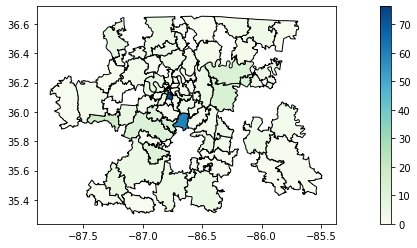

In [37]:
fig, ax = plt.subplots(figsize=(16,4))
geo_overall_refs.plot(column = 'perc_vandy_recs', 
                      ax = ax,
                     cmap = 'GnBu',
                     edgecolor = 'black',
                     legend = True)